## BUSINESS AND DATA UNDERSTANDING

The dataset comes from SyriaTel, Telecommunications company, and it is related to the number of clients lost and the financial impact it has in terms of money reduction to the company. The classification goal is to predict whether a customer will ('soon') stop doing business with SyriaTel. The dataset is from kaggle and it can be downloaded from [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

One of the major challenges in the business sector is predicting and analyzing customer behavior patterns. Psychological (motivation, perception, learning, beliefs, and attitudes), personal (age and life cycle stage, occupation, economic circumstances, lifestyle, personality, and self concept), social (reference groups, family, roles, and status), and cultural (religious, ethnic, and racial) factors all have an impact on consumer behavior (culture, subculture, social class system).

Machine language can work in conjunction with Big Data tools to manage unstructured and rapidly expanding data thanks to technological advancements. Consumer behavior is one of the key factors taken into account in the commercial sector.

We may now employ machine learning algorithms to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company.

In [1]:
#Loading the necessary packages for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


### Data Exploration

In [2]:
#Loading the dataset
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")

#Identifying the number of rows and columns of our dataset
print(data.shape)

#Getting the column names
print(list(data.columns))

#Getting the different characteristics of our data
data.info()

(3333, 21)
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64 

The dataset has 3333 rows and 21 columns, We have several variables that are objects, we now explore them further to understand the categories. 

In [3]:
#checking the categories for object data types
print(data['international plan'].unique())
print(data['voice mail plan'].unique())

['no' 'yes']
['yes' 'no']


The unique values are either yes or no for the 2 objects that is international plan and voicemail plan.

In [4]:
#Exploring the statistical attributes of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The table above gives us a feel of the data statistical distribution, we get to observe that for a variable such as total day minutes, the mean is 179.78

False    2850
True      483
Name: churn, dtype: int64


<AxesSubplot:>

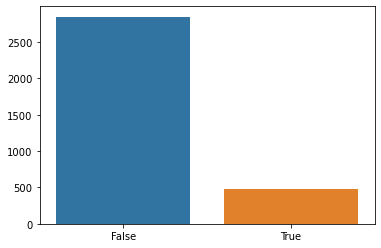

In [5]:
#identifying the number of counts in our binary column of interest
y_churn = data['churn'].value_counts()
print(y_churn)

#visualizing the imbalance
sns.barplot(y_churn.index, y_churn.values)

The dataset is imbalanced, as we have 2850 False values and 483 True values, and this is well represented with the bargraph.

### Data Cleaning 

In [6]:
#checking for missing values
data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The data has no missing values.

In [7]:
# check for duplicated rows
data.duplicated().sum()

0

The dataset has no duplicated values.

In [8]:
#Splitting the data into categorical and numerical
categorical = []
continous = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical.append(column)
    else:
        continous.append(column)

state : ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
account length : [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 2

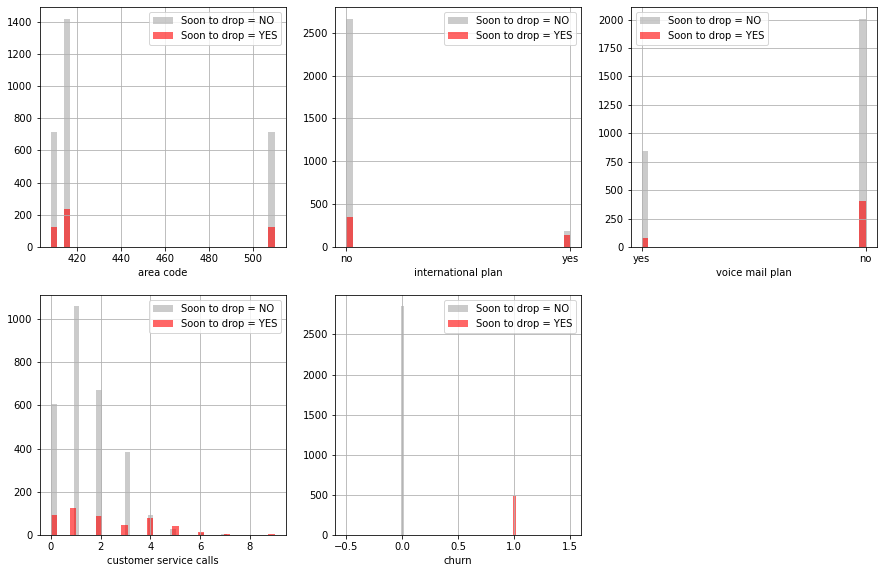

In [9]:
#Plotting the categorical variables in relation to the dependent variable 'churn'
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    data[data["churn"] == 0][column].hist(bins=35, color='darkgray', label='Soon to drop = NO', alpha=0.6)
    data[data["churn"] == 1][column].hist(bins=35, color='red', label='Soon to drop = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observation:<br>
Someone who has no voicemail plan has a high probability of dropping soon as compared to someone who has the voicemail plan.<br>
Someone who has no international plan has a high probability of dropping soon as compared to someone who has the international plan.

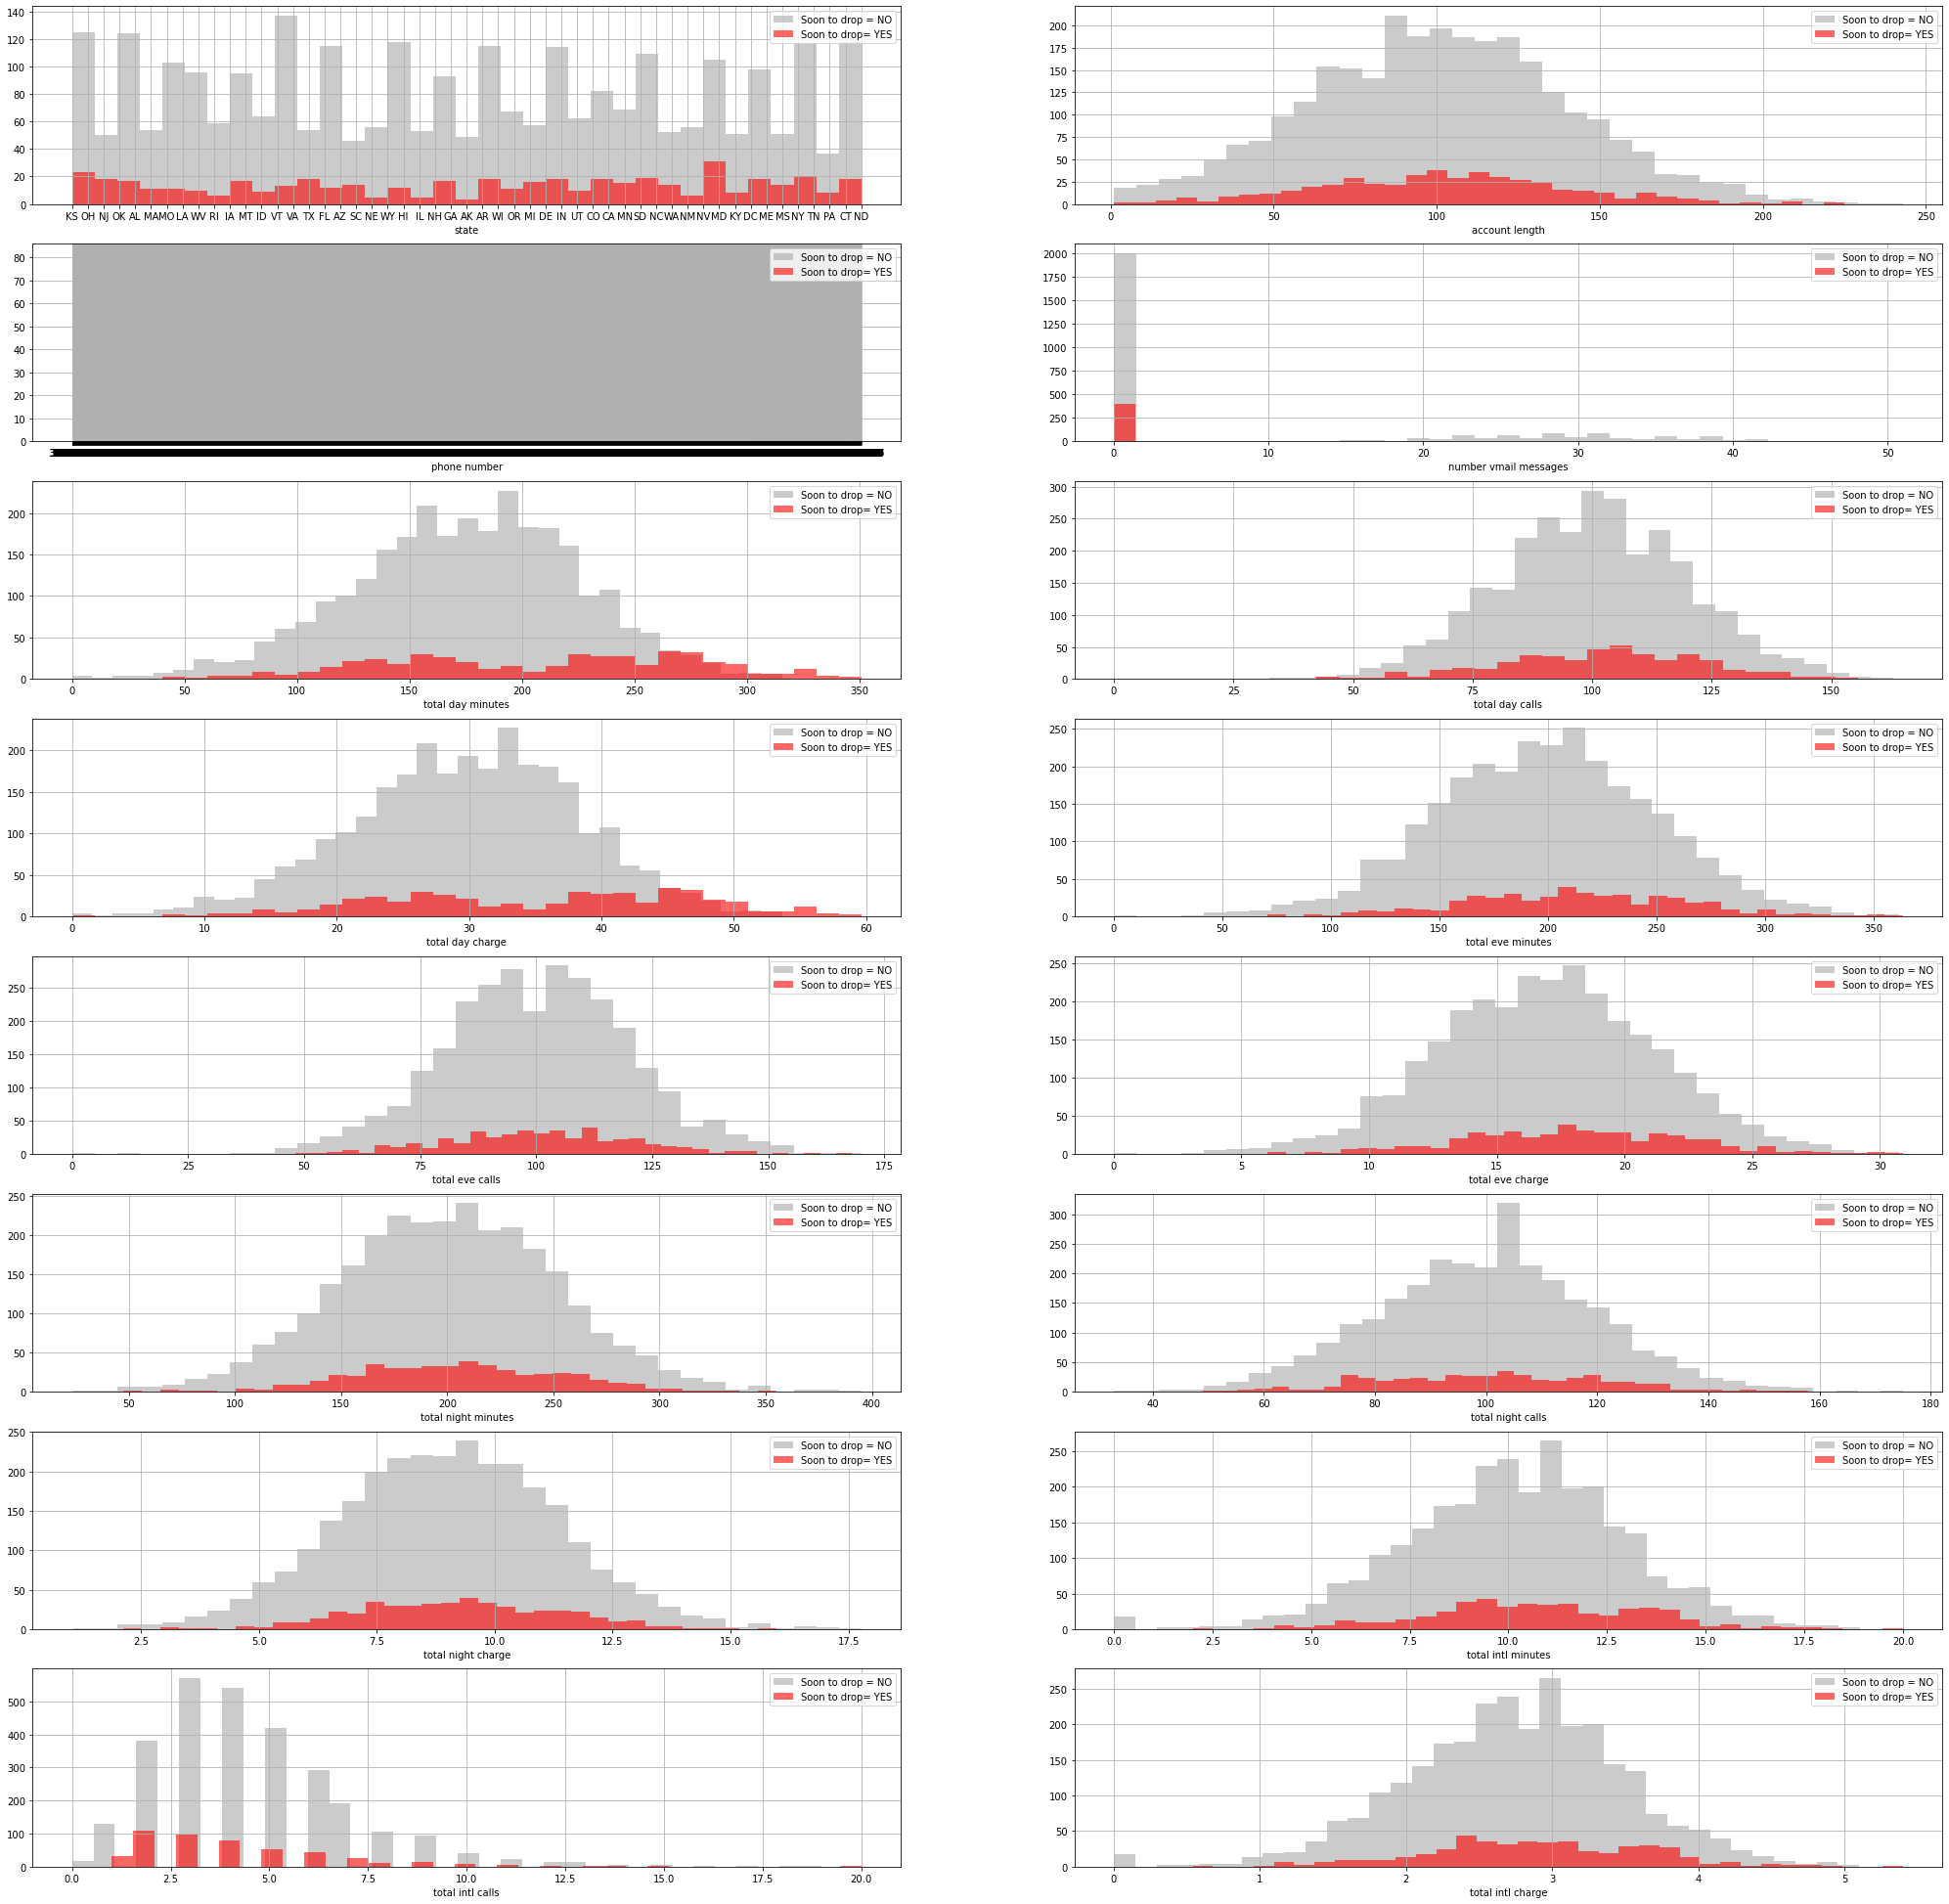

In [10]:
#continuous variables in relation to the dependent variable churn
plt.figure(figsize=(35, 35))

for i, column in enumerate(continous, 1):
    plt.subplot(8,2,i)
    data[data["churn"] == 0][column].hist(bins=35, color='darkgray', label='Soon to drop = NO', alpha=0.6)
    data[data["churn"] == 1][column].hist(bins=35, color='red', label='Soon to drop= YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

The phone number column  will not have any effect on our dataset, so we go ahead and drop it.

In [11]:
#Dropping the phone number column
data.drop(['phone number'], axis = 1, inplace = True)
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Correlation Matrix 

(17.5, -0.5)

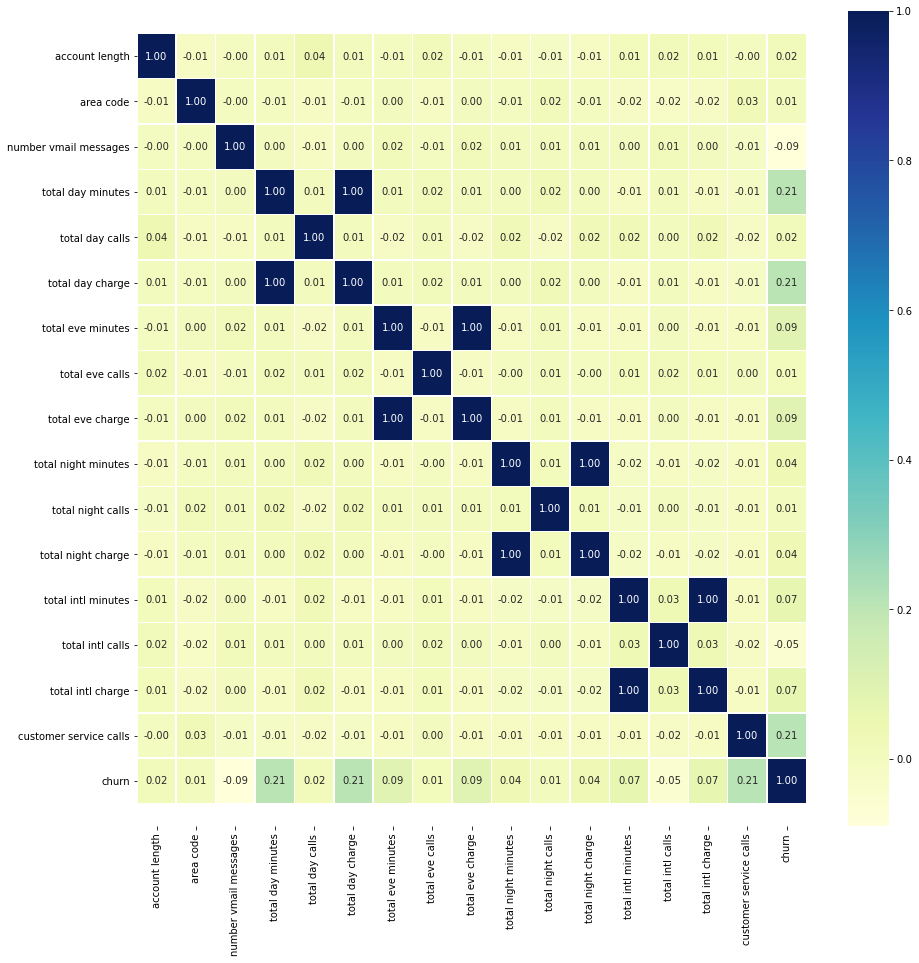

In [12]:
# Creating a correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, annot=True,linewidths=0.5, fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Observation:<br>
Total day minutes & total day charge - correlation 1 <br>
Total eve minutes & total eve charge - correlation 1 <br>
Total night minutes & total night charge - correlation 1 <br>
Total intl minutes & total intl charge - correlation 1

<AxesSubplot:title={'center':'Correlation with churn'}>

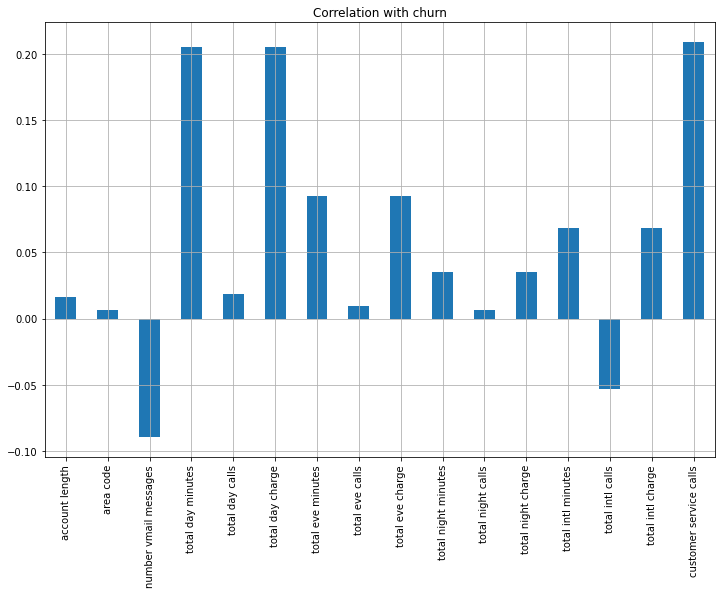

In [13]:
data.drop('churn', axis=1).corrwith(data.churn).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with churn")

Area code and total night calls are the least correlated variables with churn.

### Data Processing. 

In [14]:
###handling the categorical columns
print(data.dtypes)

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


After studying the dataset, we can see that before training the machine learning models, we must scale all values and change some categorical variables to dummy variables.

I'll thus use the get_dummies method to generate dummy columns for categorical variables for this task:

In [15]:
from sklearn.preprocessing import OneHotEncoder
encoded_data = pd.get_dummies(data, drop_first=True, dtype = float)
print(encoded_data.dtypes)

account length              int64
area code                   int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
                           ...   
state_WI                  float64
state_WV                  float64
state_WY                  float64
international plan_yes    float64
voice mail plan_yes       float64
Length: 69, dtype: object


### DEFINING THE PREDICTOR AND TARGET VARIABLES

Defining X (the predictor variables) and y(the target variable) and performing a standard train-test split. Assigning 25% to the test set and random_state to 42.

In [16]:
y=encoded_data['churn']

X = encoded_data.drop(['churn'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [17]:
#Finding the class imbalance in the test and train set
print(y_train.value_counts())
print('\n')
print(y_test.value_counts())

False    2141
True      358
Name: churn, dtype: int64


False    709
True     125
Name: churn, dtype: int64


It is vivid that our dataset is imbalanced.

###  Logistic Regression (initial model)

To forecast the number of customers to drop soon, I will now train a machine learning model.I'll employ the logistic regression algorithm.

But first, I'll create a helper function for publishing the classification report of the machine learning model's performance before I train the model:

In [18]:
def performance_score(classif, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = classif.predict(X_train)
        classif_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classif_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = classif.predict(X_test)
        classif_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n {classif_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

We now use the logistic regression model. Then plot the ROC curve and print out the AUC. We'll use this as a comparison for how our future models perform.

AUC: 0.8203667136812411


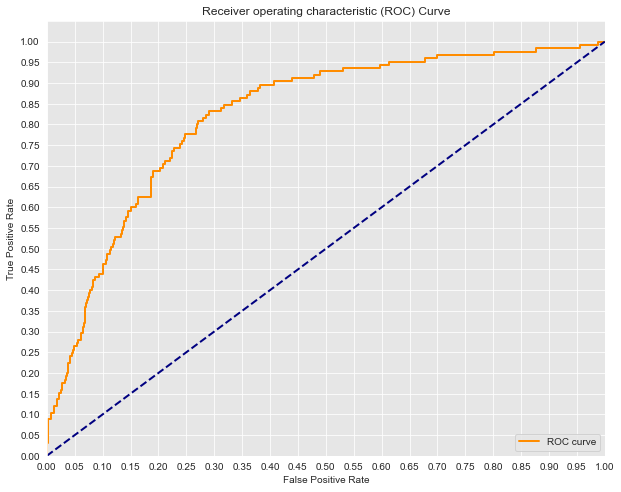

In [19]:
# Initial Model
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The area under the curve is 0.8204

We now go ahead and print the classification report for the Logistic Regression model

In [30]:
performance_score(logreg, X_train, y_train, X_test, y_test, train=True)
performance_score(logreg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 74.83%
_______________________________________________
CLASSIFICATION REPORT:
                 False        True  accuracy    macro avg  weighted avg
precision     0.943142    0.329130  0.748299     0.636136      0.855180
recall        0.751518    0.729050  0.748299     0.740284      0.748299
f1-score      0.836496    0.453519  0.748299     0.645007      0.781632
support    2141.000000  358.000000  0.748299  2499.000000   2499.000000
_______________________________________________
Confusion Matrix: 
 [[1609  532]
 [  97  261]]

Test Result:
Accuracy Score: 76.14%
_______________________________________________
CLASSIFICATION REPORT:
                 False        True  accuracy   macro avg  weighted avg
precision    0.939655    0.354331  0.761391    0.646993      0.851927
recall       0.768688    0.720000  0.761391    0.744344      0.761391
f1-score     0.845617    0.474934  0.761391    0.660275      0.790059
support    709.000000  125.000000  0.761391  834

In [54]:
testing_score = accuracy_score(y_test, logreg.predict(X_test)) * 100
training_score = accuracy_score(y_train, logreg.predict(X_train)) * 100

results_data = pd.DataFrame(data=[["Logistic Regression", training_score, testing_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_data

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,74.829932,76.139089


The model works quite well on the test set, providing results with nearly the same accuracy as on the training set. Since we have the training accuracy for LogisticRegression is 74.83% while for the testing data is 76.14%.

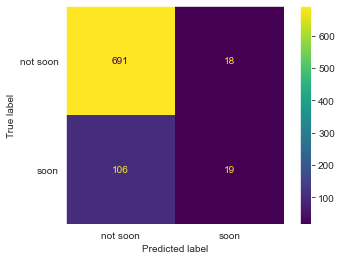

In [20]:
# Plot confusion matrix of the test set
plot_confusion_matrix(logreg, X_test, y_test,
                      display_labels=["not soon", "soon"],
                      values_format=".5g")
plt.grid(False) # removes the annoying grid lines from plot
plt.show()

### Fine Tuning the Model

LogisticRegression(C=0.001, fit_intercept=False, solver='liblinear')
AUC for 0.001: 0.7481974612129759
-------------------------------------------------------
LogisticRegression(C=0.01, fit_intercept=False, solver='liblinear')
AUC for 0.01: 0.7986234132581099
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.8191706629055009
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.8203667136812411
-------------------------------------------------------
LogisticRegression(C=10, fit_intercept=False, solver='liblinear')
AUC for 10: 0.8154809590973201
-------------------------------------------------------
LogisticRegression(C=100, fit_intercept=False, solver='liblinear')
AUC for 100: 0.8156614950634696
-------------------------------------------------------


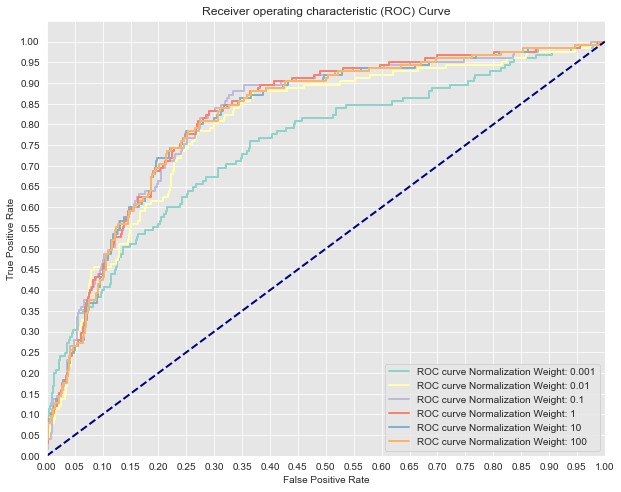

In [23]:
#I will go ahead and compare a few different regularization performances on the dataset:
parameter_range = [0.001, 0.01, 0.1, 1, 10, 100]
names = [0.001, 0.01, 0.1, 1, 10, 100]
colors = sns.color_palette('Set3')

plt.figure(figsize=(10, 8))

for n, c in enumerate(parameter_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [24]:
# Reviewing the original class distribution
print(y_train.value_counts()) 

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

False    2141
True      358
Name: churn, dtype: int64


True     2141
False    2141
Name: churn, dtype: int64


The class distribution is now well balanced with 2141 for both true and False.

LogisticRegression(C=0.005, fit_intercept=False, solver='liblinear')
AUC for 0.005: 0.792496473906911
-------------------------------------------------------
LogisticRegression(C=0.1, fit_intercept=False, solver='liblinear')
AUC for 0.1: 0.8164062059238364
-------------------------------------------------------
LogisticRegression(C=0.2, fit_intercept=False, solver='liblinear')
AUC for 0.2: 0.8154245416078985
-------------------------------------------------------
LogisticRegression(C=0.5, fit_intercept=False, solver='liblinear')
AUC for 0.5: 0.812299012693935
-------------------------------------------------------
LogisticRegression(C=0.8, fit_intercept=False, solver='liblinear')
AUC for 0.8: 0.8108434414668548
-------------------------------------------------------
LogisticRegression(C=1, fit_intercept=False, solver='liblinear')
AUC for 1: 0.8101777150916784
-------------------------------------------------------
LogisticRegression(C=1.25, fit_intercept=False, solver='liblinear')
AUC 

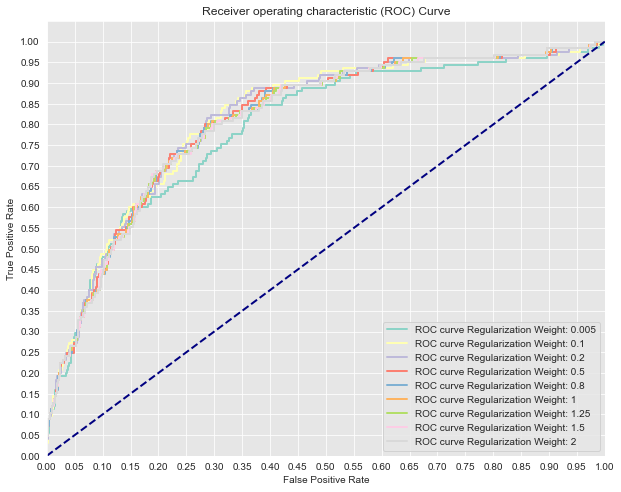

In [25]:
# Comparing a few regularization performances on the dataset
parameter_range = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
names = [0.005, 0.1, 0.2, 0.5, 0.8, 1, 1.25, 1.5, 2]
colors = sns.color_palette('Set3', n_colors=len(names))

plt.figure(figsize=(10, 8))

for n, c in enumerate(parameter_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [64]:
#Using KNeighbors Classifier
clf_kn = KNeighborsClassifier()
clf_kn.fit(X_train, y_train)
predictions = clf_kn.predict(X_test)
print("accuracy_score",accuracy_score(y_test, predictions))
print("auc",roc_auc_score(y_test, predictions))

accuracy_score 0.8657074340527577
auc 0.5981269393511989


The Accuracy score for the Kneighbors is 0.8657 <br>
The Area under the curve is 0.5981

In [32]:
testing_score = accuracy_score(y_test, clf_kn.predict(X_test)) * 100
training_score = accuracy_score(y_train, clf_kn.predict(X_train)) * 100

results_data = pd.DataFrame(data=[["KNeighbors", training_score, testing_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_data

,Model,Training Accuracy %,Testing Accuracy %
0,KNeighbors,89.27571,86.570743


The training accuracy for KNeighbors is 89.27% while for the testing data is 86.57%.

In [28]:
#Using DecisionTree Classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
predictions = clf_dt.predict(X_test)
print("accuracy_score",accuracy_score(y_test, predictions))
print("auc",roc_auc_score(y_test, predictions))

accuracy_score 0.9172661870503597
auc 0.8492016925246827


The Accuracy score for the Decision Tree is 0.9173 <br>
The Area under the curve is 0.8492

In [29]:
#Getting the classification report of the decision tree
performance_score(clf_dt, X_train, y_train, X_test, y_test, train=True)
performance_score(clf_dt, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
            False   True  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    2141.0  358.0       1.0     2499.0        2499.0
_______________________________________________
Confusion Matrix: 
 [[2141    0]
 [   0  358]]

Test Result:
Accuracy Score: 91.73%
_______________________________________________
CLASSIFICATION REPORT:
                 False        True  accuracy   macro avg  weighted avg
precision    0.955840    0.712121  0.917266    0.833981      0.919312
recall       0.946403    0.752000  0.917266    0.849202      0.917266
f1-score     0.951099    0.731518  0.917266    0.841308      0.918188
support    709.000000  125.000000  0.917266  834.000000    834.000000
_____________________________________

#testing_score = accuracy_score(y_test, clf_dt.predict(X_test)) * 100
training_score = accuracy_score(y_train, clf_dt.predict(X_train)) * 100

results_data = pd.DataFrame(data=[["Decision Tree Classifiers", training_score, testing_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_data

The training accuracy for Decision Tree classifiers is 100% while for the testing data is 91.7%.

### Final Model Choice

Plotting the ROC curve and getting the AUC so that we can select the final model with this being the consideration.

In [62]:
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
#decision tree
model3 = DecisionTreeClassifier()
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score1, auc_score2, auc_score3)

0.7790352609308885 0.6888744710860367 0.8477912552891396


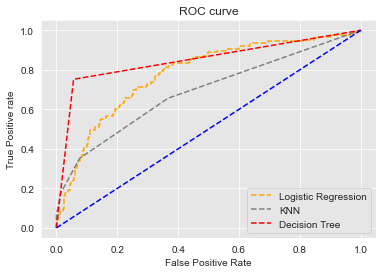

In [63]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='grey', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### Conclusion

I will settle with the Decision Tree Classifier since it has the highest testing accuracy, in comparison with the other models, it also has the highest area under the curve. This will be the best model to predict the customers to drop off soon.